In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn. ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Read Data

In [152]:
iris_data=pd.read_csv("IRIS.csv")

In [153]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [154]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [155]:
# iris_data['petal_length'].fillna(iris_data['petal_length'].mean(),inplace=True)
# iris_data['petal_width'].fillna(iris_data['petal_width'].mean(),inplace=True)
# iris_data['sepal_length'].fillna(iris_data['sepal_length'].mean(),inplace=True)
# iris_data['sepal_width'].fillna(iris_data['sepal_width'].mean(),inplace=True)
iris_data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)
iris_data

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_27820\3376964438.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [156]:
x=iris_data.drop(columns='species')
y=iris_data[['species']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [157]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
r_pred=model.predict(x_test)
r_pred_train=model.predict(x_train)
acc_train=accuracy_score(r_pred_train,y_train)
accuracy=accuracy_score(r_pred,y_test)
print("train accuracy: ",acc_train )
print("accuracy_score: ",accuracy)

train accuracy:  1.0
accuracy_score:  0.9666666666666667


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


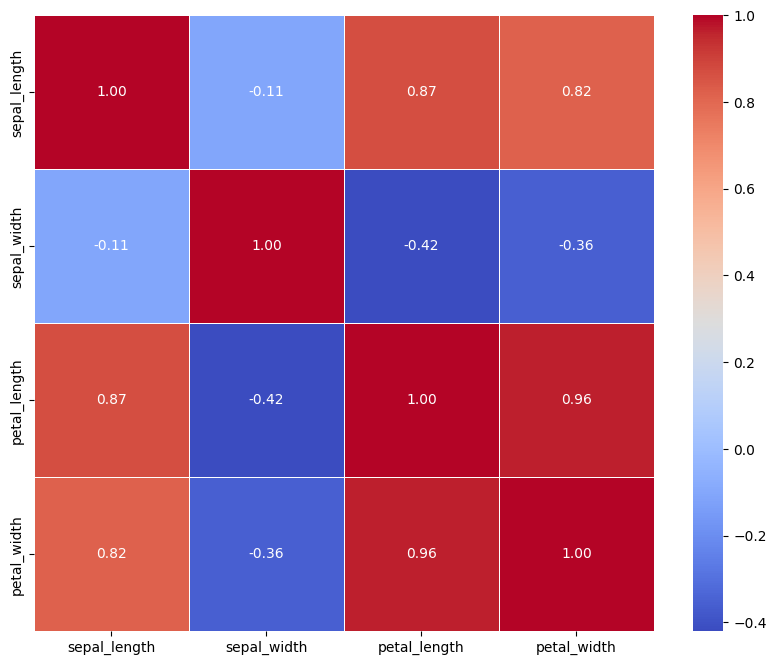

In [158]:
corr_mat = iris_data.drop(columns=['species']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [160]:
import gradio as gr
def predict(petal_length,petal_width,sepal_length,sepal_width):
    petal_length=float(petal_length)
    petal_width=float(petal_width)
    sepal_length=float(sepal_length)
    sepal_width=float(sepal_width)
    features=[[petal_length,petal_width,sepal_length,sepal_width]]
    prediction=model.predict(features)[0]
    return prediction

demo = gr.Interface(
    fn=predict,
    inputs=[
        "number",
        "number",
        "number",
        "number",        
    ],
    outputs=["text"],
    
)
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7873
Running on public URL: https://2a8a4e60a8641cbc51.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
